<div style="background-color: #4CAF50; padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
  <h1 style="color: #FFFFFF; font-family: 'Arial', sans-serif; font-size: 36px; font-weight: bold; text-transform: uppercase; letter-spacing: 2px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);">
    House Price Prediction 🏡
  </h1>
  <p style="text-align: center; font-family: 'Verdana', sans-serif; font-size: 18px; color: #F0F0F0;">
  Transforming real estate data into actionable insights to forecast market trends with accuracy!
</p>
</div>


<img src="https://th.bing.com/th/id/OIP.mzSZsdo8lKkahN5S-Uk_qAHaEK?rs=1&pid=ImgDetMain" alt="House Price Prediction" style="display: block; margin: auto; border: 2px solid black; border-radius: 8px;">


<div style="background: linear-gradient(135deg, #1e3c72, #2a5298); color: #f0f8ff; font-family: 'Arial', sans-serif; font-weight: bold; text-align: center; border: 3px solid #87ceeb; border-radius: 15px; padding: 15px; width: 300px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); margin: 20px auto;">
  Data Analysis
</div>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing custom matplotlib parameters for vizualizations
plt.rcParams['figure.figsize'] = (14,4)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams["font.family"] = "monospace";

# Color Palettes
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]

In [3]:
#importing Dataset
house = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
house_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

#checking dataset
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.describe().T.style \
    .bar(subset=['mean'], color='#FF4500') \
    .background_gradient(cmap="viridis", subset=['std', '50%', 'max']) \
    .highlight_max(axis=0, color='limegreen') \
    .highlight_min(axis=0, color='skyblue') \
    .set_caption(
        "<div style='color: #2c3e50; font-size: 20px; font-weight: bold; font-family: Arial, sans-serif; text-align: center; background-color: #f4f4f4; padding: 10px; border-radius: 8px;'>"
        "📊 Key Statistics of the House Dataset 📊"
        "</div>"
    ) \
    .set_properties(**{
        'font-size': '16px',
        'font-weight': 'bold',
        'color': 'midnightblue',
        'background-color': '#f8f9fa',
        'border': '1px solid black',
        'text-align': 'center'
    })

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


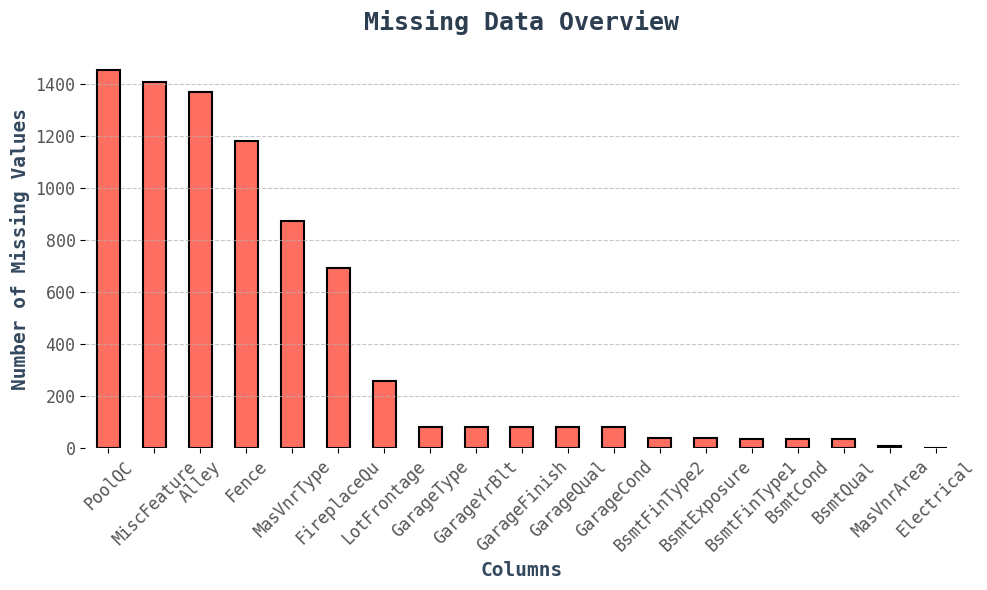

In [5]:
import matplotlib.pyplot as plt

# Checking missing values
missing = house.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)

# Stylized Bar Chart
plt.figure(figsize=(10, 6))  # Adjust size for better readability
missing.plot.bar(color='#FF6F61', edgecolor='black', linewidth=1.5)  # Set bar color and outline
plt.title('Missing Data Overview', fontsize=18, fontweight='bold', color='#2c3e50', pad=15)  # Add a styled title
plt.xlabel('Columns', fontsize=14, fontweight='bold', color='#34495e')  # Styled x-axis label
plt.ylabel('Number of Missing Values', fontsize=14, fontweight='bold', color='#34495e')  # Styled y-axis label
plt.xticks(rotation=45, fontsize=12, color='#555555')  # Rotate and style x-axis ticks
plt.yticks(fontsize=12, color='#555555')  # Style y-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for clarity
plt.box(False)  # Remove the surrounding box for a cleaner look
plt.tight_layout()  # Adjust layout to prevent overlaps
plt.show()

<div style="background-color: #f5deb3; border: 2px dashed black; padding: 10px; border-radius: 5px;">
  - We can see that some of the data got more than 50% missing data, which is not good for training the model.<br>
  - I will drop those values, and for those who are less than 50%, we will try to fill them.
</div>

<div style="background: linear-gradient(135deg, #1e3c72, #2a5298); color: #f0f8ff; font-family: 'Arial', sans-serif; font-weight: bold; text-align: center; border: 3px solid #87ceeb; border-radius: 15px; padding: 15px; width: 300px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); margin: 20px auto;">
  Target Variable
</div>

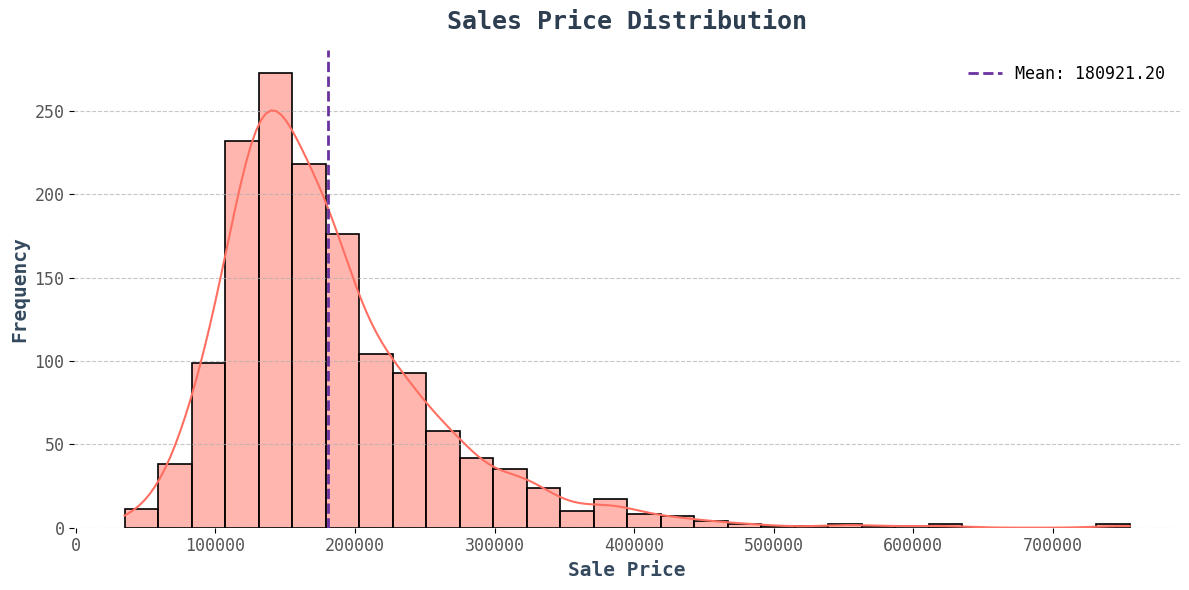

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution Plot
plt.figure(figsize=(12, 6))  # Adjust the figure size for better readability
sns.histplot(house['SalePrice'], kde=True, color='#FF6F61', bins=30, edgecolor='black', linewidth=1.2)  # Updated distribution plot
plt.axvline(x=house['SalePrice'].mean(), color='#6A329F', linestyle='--', linewidth=2, label=f"Mean: {house['SalePrice'].mean():.2f}")  # Highlight the mean
plt.title('Sales Price Distribution', fontsize=18, fontweight='bold', color='#2c3e50', pad=15)  # Styled title
plt.xlabel('Sale Price', fontsize=14, fontweight='bold', color='#34495e')  # Styled x-axis label
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='#34495e')  # Styled y-axis label
plt.xticks(fontsize=12, color='#555555')  # Styled x-axis ticks
plt.yticks(fontsize=12, color='#555555')  # Styled y-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light gridlines for y-axis
plt.legend(fontsize=12, loc='upper right', frameon=False)  # Add a legend for the mean line
plt.box(False)  # Remove the surrounding plot box for a cleaner look
plt.tight_layout()  # Optimize layout to prevent overlaps
plt.show()

In [7]:
# droping values more than 50%

y = house['SalePrice']
house = house.drop(['Id','Alley','PoolQC','Fence','MiscFeature','SalePrice'],axis=1)
house_test = house_test.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [8]:
# Extracting house.info() output
import pandas as pd
from io import StringIO

# Simulating house.info() output
info_output = StringIO()
house.info(buf=info_output)
info_text = info_output.getvalue()

# Displaying the output in a highly stylized HTML box
from IPython.core.display import display, HTML

html_content = f"""
<div style="background-color: #2c3e50; border: 3px solid #e74c3c; padding: 20px; border-radius: 15px; font-family: 'Courier New', monospace; color: #ecf0f1; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3);">
  <h3 style="text-align: center; color: #e74c3c; font-weight: bold; text-shadow: 2px 2px 4px black;">House Dataset Information</h3>
  <pre style="margin: 0; font-size: 15px; line-height: 1.8; color: #bdc3c7; background-color: #34495e; padding: 10px; border-radius: 8px;">{info_text}</pre>
</div>
"""
display(HTML(html_content))

In [9]:
num_cols = [col for col in house.columns if house[col].dtype in ['float64','int64']]
cat_cols = [col for col in house.columns if house[col].dtype not in ['float64','int64']]

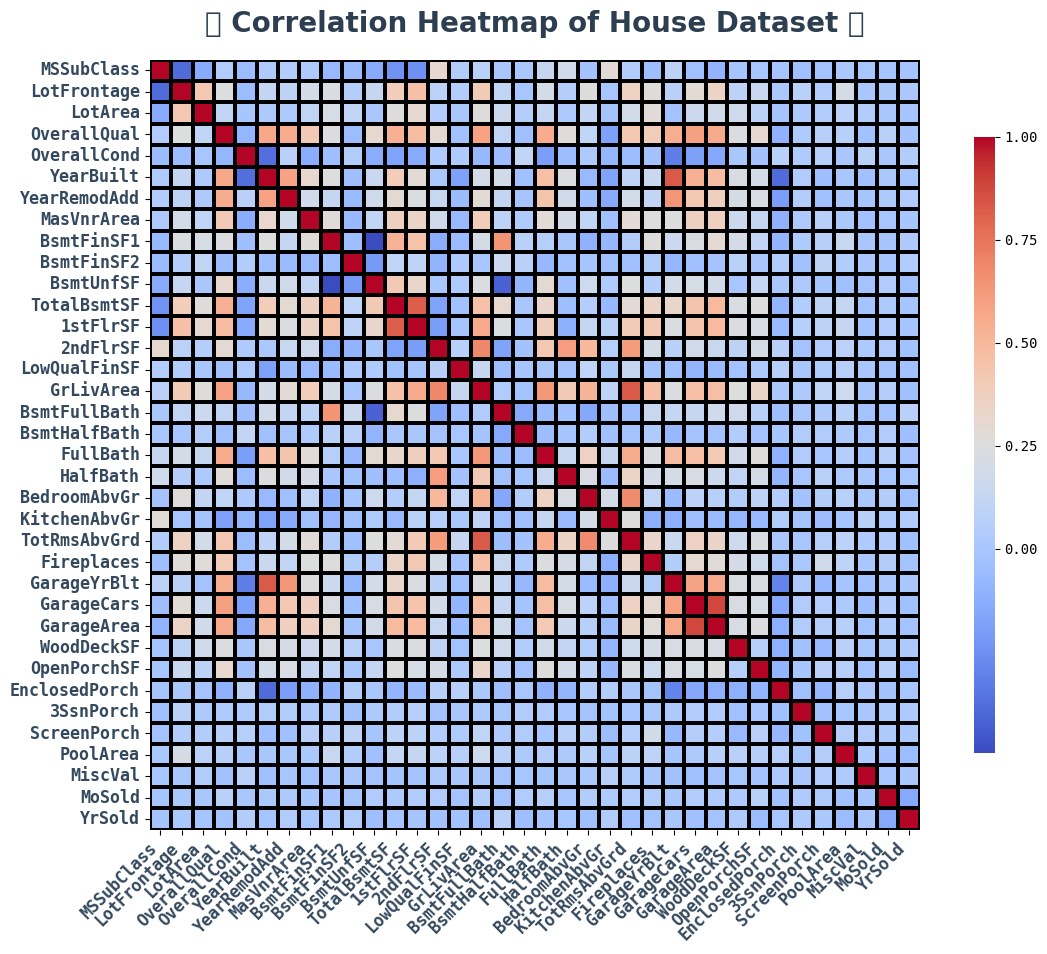

In [10]:
plt.figure(figsize=(14, 10))  # Larger figure size for better readability
correlation_matrix = house[num_cols].corr() 
sns.heatmap(
    correlation_matrix,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1.5,  # Thicker lines between cells
    linecolor="black",  # Black grid lines for a clean contrast
    square=True,  # Maintain proportional cell shapes
    cbar_kws={"shrink": 0.8, "aspect": 30, "ticks": [0, 0.25, 0.5, 0.75, 1]}  # Custom color bar
)

# Add a bold, descriptive title with custom font size and padding
plt.title("🔥 Correlation Heatmap of House Dataset 🔥", 
          fontsize=20, pad=20, color="#2c3e50", fontweight="bold", loc="center", family="DejaVu Sans")

# Improve font size and style for axes
plt.xticks(fontsize=12, rotation=45, ha="right", fontweight="bold", color="#34495e")
plt.yticks(fontsize=12, fontweight="bold", color="#34495e")

# Display the heatmap
plt.show()

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

house[num_cols] = SimpleImputer().fit_transform(house[num_cols])
house_test[num_cols] = SimpleImputer().fit_transform(house_test[num_cols])

house[num_cols] = MinMaxScaler().fit_transform(house[num_cols])
house_test[num_cols] = MinMaxScaler().fit_transform(house_test[num_cols])

In [12]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu',
                'MasVnrType','Electrical','MSZoning','Utilities','Functional','Exterior2nd','KitchenQual','Exterior1st','SaleType']
house[columns_None] = house[columns_None].fillna('none')
house_test[columns_None] = house_test[columns_None].fillna('none')

In [13]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(house[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))  # Use get_feature_names_out
house[encoded_cols] = encoder.transform(house[cat_cols])

In [14]:
house_test[encoded_cols] = encoder.transform(house_test[cat_cols])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
# Create training and validation sets
X_train,X_test,y_train,y_test = train_test_split(house[num_cols + encoded_cols],
                                                 y,
                                                 test_size=0.20,
                                                 random_state=42)

In [17]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [18]:
models = {
    'SVR': SVR(),
    'XGBRegressor': XGBRegressor(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'SGDRegressor': SGDRegressor(),
    'BayesianRidge': BayesianRidge(),
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),  # Ensemble boosting
    'AdaBoostRegressor': AdaBoostRegressor(),  # Boosting with base estimator
    'ExtraTreesRegressor': ExtraTreesRegressor(),  # Randomized trees
    'DecisionTreeRegressor': DecisionTreeRegressor(),  # Simpler tree model
    'KNeighborsRegressor': KNeighborsRegressor(),  # Non-linear KNN
    'KernelRidge': KernelRidge(),  # Kernelized ridge regression
    'CatBoostRegressor': CatBoostRegressor(verbose=0),  # Robust with categorical features
    'LGBMRegressor': LGBMRegressor()  # Fast gradient boosting
}

In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize lists to store results
model_results = []
model_names = []

# Train and evaluate models
for name, model in models.items():
    a = model.fit(X_train, y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)

# Create a styled DataFrame for results
df_results = pd.DataFrame({'Model': model_names, 'RMSE': model_results}) \
              .sort_values(by='RMSE', ascending=False)

# Stylish DataFrame Output
df_styled = df_results.style \
    .background_gradient(cmap="plasma", subset=['RMSE']) \
    .highlight_min(subset=['RMSE'], color='#ADE1B2', axis=0) \
    .highlight_max(subset=['RMSE'], color='#F08080', axis=0) \
    .set_caption(
        "<div style='color: #2E4053; font-size: 20px; font-weight: bold; text-align: center; font-family: Arial, sans-serif; background-color: #F4F6F7; padding: 10px; border-radius: 5px;'>"
        "Model Performance: Root Mean Squared Error (RMSE)"
        "</div>"
    ) \
    .set_properties(subset=['Model'], **{'text-align': 'left', 'font-weight': 'bold', 'font-size': '14px', 'color': '#1F618D'}) \
    .set_properties(subset=['RMSE'], **{'text-align': 'center', 'font-size': '14px', 'color': '#641E16'})

# Display the styled DataFrame
df_styled

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3197
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 184
[LightGBM] [Info] Start training from score 181441.541952


,Model,RMSE
6,LinearRegression,429038600088087.500000
0,SVR,88633.919716
3,ElasticNet,52408.466200
12,KNeighborsRegressor,41558.984630
11,DecisionTreeRegressor,39750.264395
9,AdaBoostRegressor,36096.784221
4,SGDRegressor,32291.943336
5,BayesianRidge,30637.928265
13,KernelRidge,30017.696722
2,Ridge,30012.603024


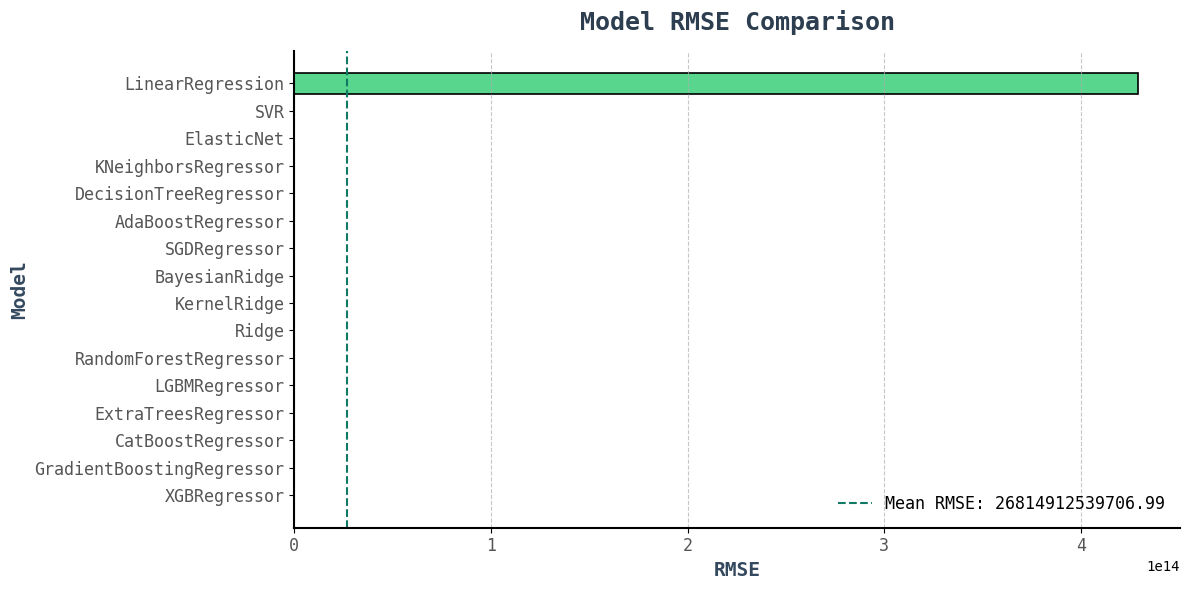

In [20]:
# Plot results with improved styling
plt.figure(figsize=(12, 6))
plt.barh(df_results['Model'], df_results['RMSE'], color='#58D68D', edgecolor='black', linewidth=1.2)
plt.axvline(x=df_results['RMSE'].mean(), color='#117A65', linestyle='--', label=f"Mean RMSE: {df_results['RMSE'].mean():.2f}")
plt.xlabel('RMSE', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Model', fontsize=14, fontweight='bold', color='#34495e')
plt.title('Model RMSE Comparison', fontsize=18, fontweight='bold', color='#2c3e50', pad=15)
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='best', frameon=False)
plt.gca().invert_yaxis()  # Reverse order for readability
plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; border: 2px solid #000080; padding: 15px; border-radius: 5px; line-height: 1.5;">
  <b>• We tried multiple models but the best model was with the lowest RMSE <em>"XGB Regressor"</em>.</b><br>
  • Now the question arises: how can we further reduce the error?<br>
  • We can reduce it by using hyperparameter tuning, but how do we decide? How do we guess the best parameters?<br>
  • Let's explore this in the next step.
</div>


<div style="background: linear-gradient(135deg, #1e3c72, #2a5298); color: #f0f8ff; font-family: 'Arial', sans-serif; font-weight: bold; text-align: center; border: 3px solid #87ceeb; border-radius: 15px; padding: 15px; width: 300px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); margin: 20px auto;">
  Hyper Parameter Tuning
</div>

In [21]:
#taking best params
optimized_params = {
    'lambda': 4.5,  # Higher for more regularization
    'alpha': 0.3,   # Slight increase
    'colsample_bytree': 0.7,  # More diverse trees
    'subsample': 0.7,         # Larger sample of data per tree
    'learning_rate': 0.02,    # Slightly faster convergence
    'n_estimators': 3000,     # Reduce for quicker training
    'max_depth': 10,          # Balance between complexity and overfitting
    'random_state': 24,       # Fixed for reproducibility
    'min_child_weight': 2     # Slightly smaller for flexibility
}

In [22]:
#applying it in the model
XGBR = XGBRegressor(**optimized_params)

XGBR.fit(X_train, y_train)
predicted = XGBR.predict(X_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')

Root Mean Square Error test = 25142.755175033748


<div style="background: linear-gradient(135deg, #1e3c72, #2a5298); color: #f0f8ff; font-family: 'Arial', sans-serif; font-weight: bold; text-align: center; border: 3px solid #87ceeb; border-radius: 15px; padding: 15px; width: 300px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); margin: 20px auto;">
  Submission
</div>

In [23]:
test_preds = XGBR.predict(house_test[num_cols + encoded_cols])

In [24]:
submission_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission_df['SalePrice'] = test_preds
submission_df.to_csv('finalSubmission.csv', index=False)

<div style="background-color: #f5f5dc; border: 2px solid #8b0000; padding: 15px; border-radius: 8px; font-family: Arial, sans-serif; line-height: 1.6;">
  <ul style="margin: 0; padding-left: 20px;">
    <li>Further we can try different methods or tweaks.</li>
    <li>As we don’t have any domain knowledge of the real estate.</li>
    <li>We deleted some columns which have missing data more than 50%, maybe start with it.</li>
  </ul>
</div>

In [25]:
submission_df.head()

,Id,SalePrice
0,1461,142866.046875
1,1462,171258.375000
2,1463,183346.265625
3,1464,194787.156250
4,1465,214298.250000
